In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station=Base.classes.station
measurement =Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Exploring database
#Get list of columns and types for station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
#columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#Get list of columns and types for measurement table
measure_columns = inspector.get_columns('measurement')
for c in measure_columns:
    print(c['name'], c["type"])
#columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date_measurement =session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date_measurement

('2017-08-23',)

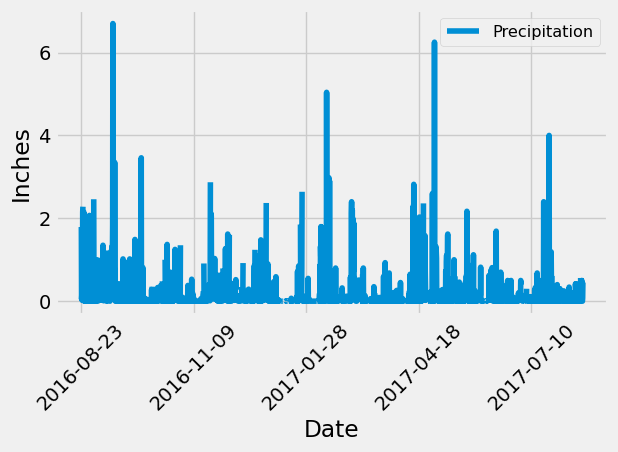

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=dt.date(2017,8,23)


# Calculate the date one year from the last date in data set.
last_year= recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data= session.query(measurement.date,measurement.prcp).\
    filter(measurement.date>= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data , columns= ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_df=prcp_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind ='line', x='Date', y= 'Precipitation', xlabel= "Date", ylabel= "Inches",grid= True, rot=45)
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.savefig("Precipitation analysis.png")
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id.distinct()).count()

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station= session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active= active_station[0][0]
print(f'{most_active} is the most active station')
active_station

USC00519281 is the most active station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station== most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temperature=session.query(measurement.date,measurement.tobs).\
    filter(measurement.date>= last_year).\
    filter(measurement.station== most_active).all()
most_active_temperature




[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

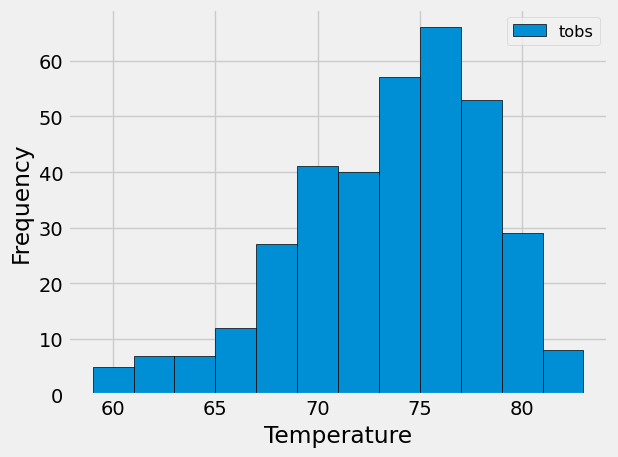

In [42]:
#creating a pandas dataframe for the query
most_active_df = pd.DataFrame(most_active_temperature , columns= ["Date", "Temperature"])

# Sort the dataframe by date
most_active_df=most_active_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
most_active_df.plot.hist(xlabel = "Temperature",grid= True, bins=12, edgecolor='black')
plt.legend(['tobs'],loc='upper right', fontsize='small')
plt.tight_layout()
plt.savefig("Temperature_histogram.png")
plt.show()

# Close Session

In [43]:
# Close Session
session.close()